# Model Selection and Classification Exercise

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

## The Bank Marketing Data Set

* The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

* More information please visit: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


### Attribute Information:

### Bank client data:
* `age` (numeric)
* `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* `default`: has credit in default? (categorical: 'no','yes','unknown')
* `housing`: has housing loan? (categorical: 'no','yes','unknown')
* `loan`: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
* `contact`: contact communication type (categorical: 'cellular','telephone') 
* `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

### Other attributes:
* `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* `previous`: number of contacts performed before this campaign and for this client (numeric)
* `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
* `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
* `cons.price.idx`: consumer price index - monthly indicator (numeric) 
* `cons.conf.idx`: consumer confidence index - monthly indicator (numeric) 
* `euribor3m`: euribor 3 month rate - daily indicator (numeric)
* `nr.employed`: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
* `y` - has the client subscribed a term deposit? (binary: 'yes','no')

## Problem Statement

### You are assigned to build a classification model to predict a probability that a client will subscribe a term deposit so that the company can target the right clients.

### Implement model selection; candidate models are Logistic Regression and Decision Tree; 
### Use 'roc_auc' as evaluation metric: https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it

In [21]:
import pandas as pd

df = pd.read_csv('bank/bank-additional-full.csv')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Exploration

In [22]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

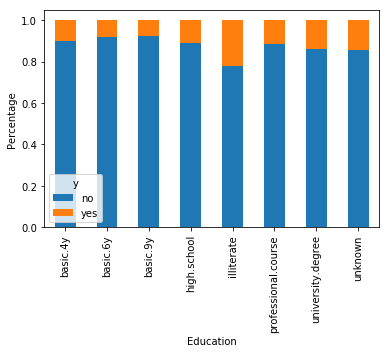

In [23]:
education_y = pd.crosstab(df.education, df.y)
education_y.div(education_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Percentage')

In [24]:
"""
DO SOME DATA EXPLORATION
"""
df.shape

(41188, 20)

In [25]:
df.groupby('y').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,
no,39.911185,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


## Data Pre-Processing

PREPROCESS YOUR y

In [26]:
from sklearn.preprocessing import LabelEncoder

y = df.y.values   # same as  y = df['y'].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['no', 'yes'], dtype=object)

In [27]:
## transform y to number values
le.transform(['no', 'yes'])

array([0, 1], dtype=int64)

PREPROCESS YOUR X

In [28]:
## Get features 
####### Bad code: Remove column 'y' using manual list 
features_list = ['age','job','marital','education','default','housing','loan','contact'
                ,'month','day_of_week','campaign','pdays','previous','poutcome'
                ,'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m'
                ,'nr.employed']
X_tmp = df[features_list]

X_tmp.head() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [29]:
## Get features 
####### Easiest way: Remove column 'y' using drop() (axis = 1 means column)
X_tmp = df.drop('y', axis = 1)

X_tmp.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [30]:
## Transform all X_tmp value to quantitative values(string to number) and save to X
# Method 1: hardcode features_category_list

features_category_list = ['job', 'marital', 'education', 'default', 'housing'
                          , 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 

print(features_category_list)       
X = pd.get_dummies(X_tmp, columns=features_category_list)
X.head()
#X.as_matrix()

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
## Transform all X_tmp value to quantitative values(string to number) and save to X
# Method 2: get features_category_list by coding: default python method

import numpy as np

features_category_list = [] 
for col_name in X_tmp.columns:
    var_type = type(X_tmp[col_name][0])
    is_number=isinstance(X_tmp[col_name][0], np.number)
    #print('{colname} {vartype} {isnumber}'.format(colname=col_name, vartype=var_type, isnumber=is_number))
    if is_number == False:
        features_category_list.append(col_name)

print(features_category_list)       
X = pd.get_dummies(X_tmp, columns=features_category_list)
X.head()

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
## Transform all X_tmp value to quantitative values(string to number) and save to X
# Method 3: get features_category_list by coding: numpy method

features_category_list = []
for col in list(X_tmp):
    if isinstance(X_tmp.loc[0,col], str):
        features_category_list.append(col)

print(features_category_list)
X = pd.get_dummies(X_tmp, columns = features_category_list)
X.head()

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


# Model Selection

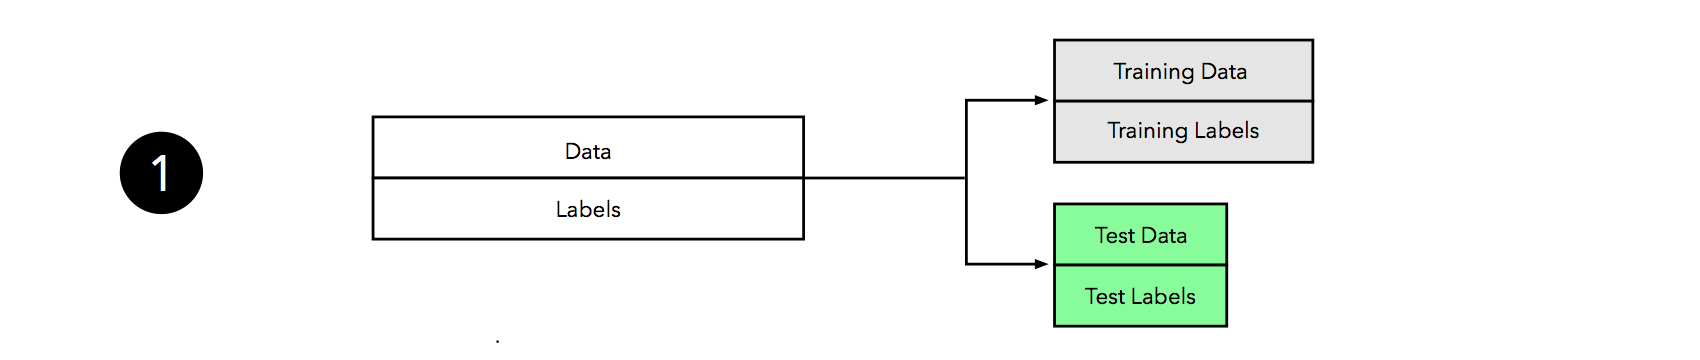

In [33]:
Image(filename='images/ms_1.png', width=1000) 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.2,
                                                     stratify=y,
                                                     random_state=1)

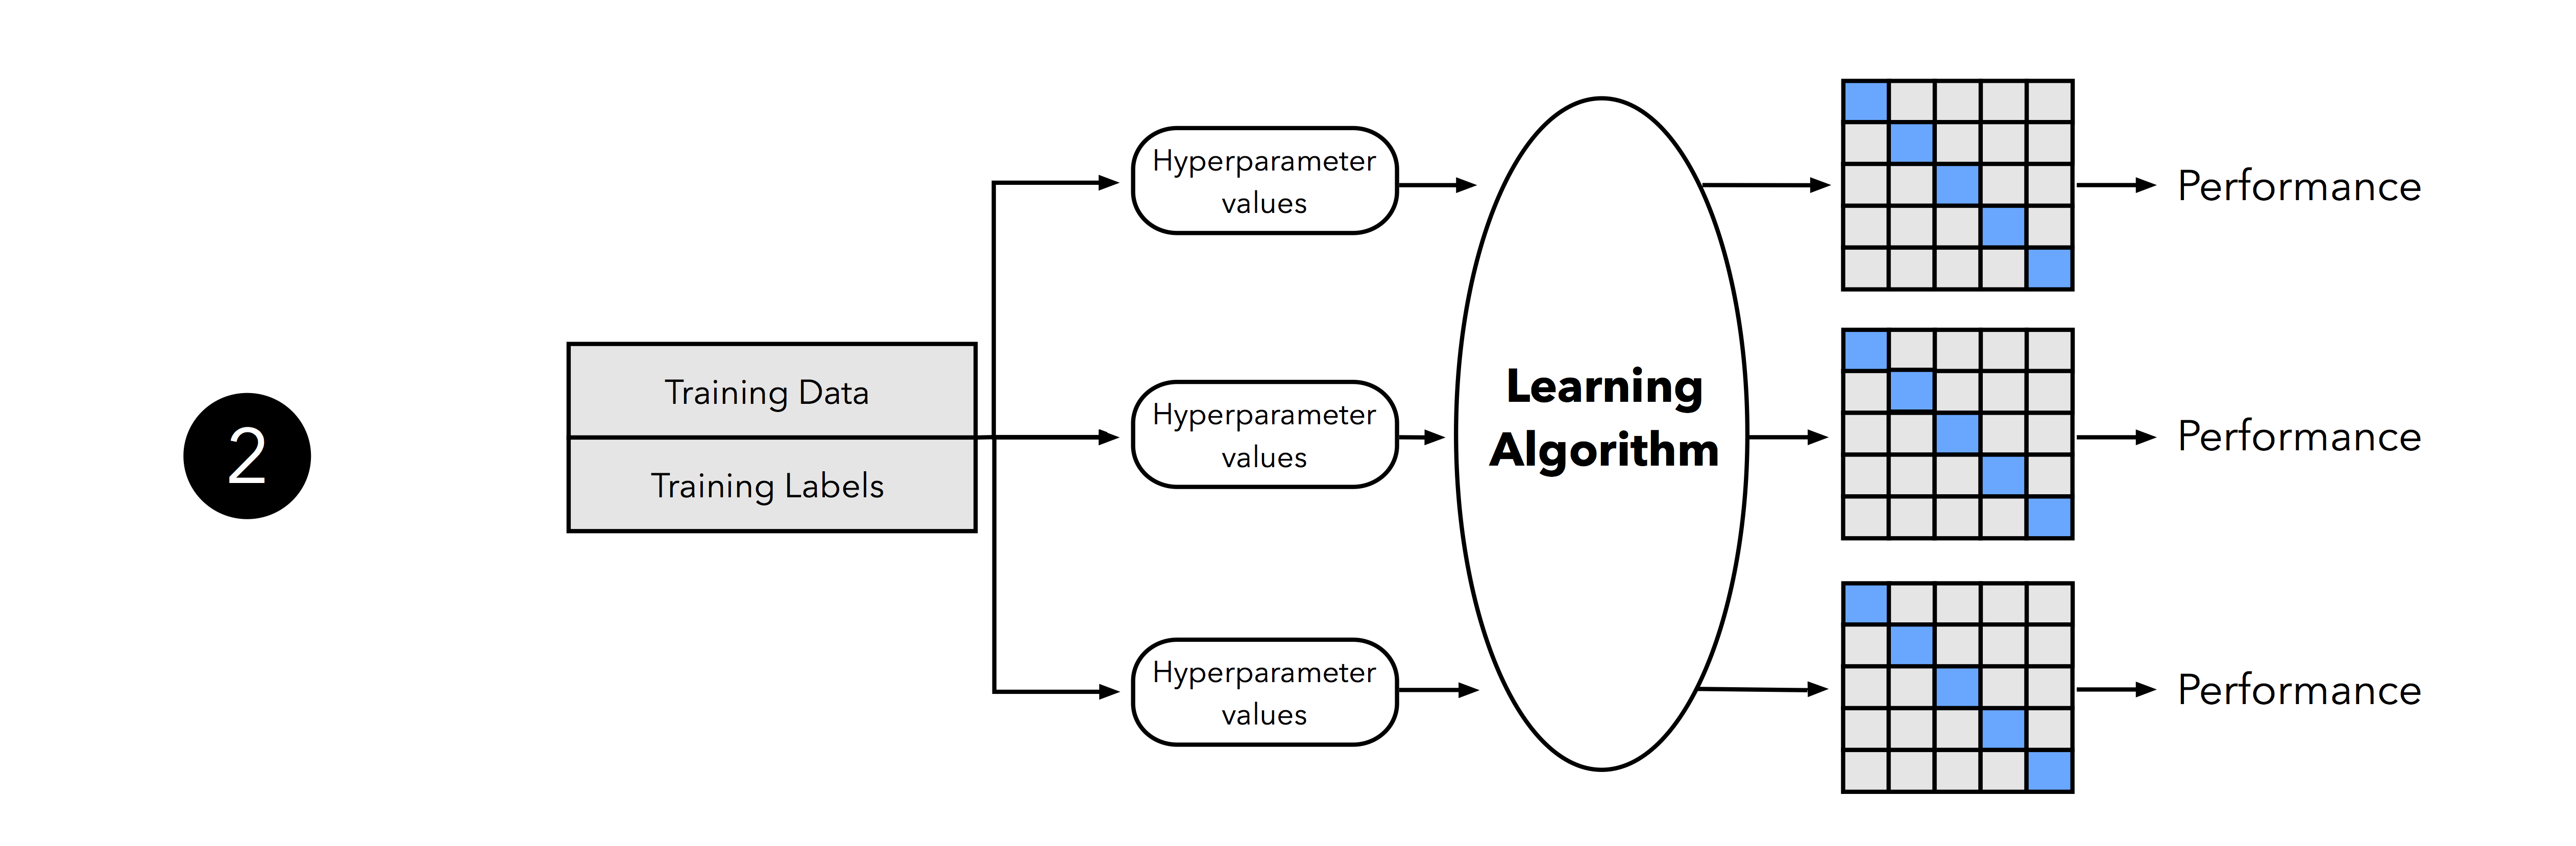

In [35]:
Image(filename='images/ms_2.png', width=1000) 

In [36]:
"""
DO HYPER-PARAMETER SEARCH
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

param_grid_lr = [{'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]

gs_lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid_lr, 
                  scoring='accuracy', 
                  cv=10,
                  refit=True)
gs_lr = gs_lr.fit(X_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.best_params_)


0.899939301973
{'logisticregression__C': 0.1}


In [134]:
#Find out which feature is important?


In [37]:
pipe_dt = make_pipeline(DecisionTreeClassifier(random_state=1))

param_grid_dt = [{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
               'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}]

gs_dt = GridSearchCV(estimator=pipe_dt,
                  param_grid=param_grid_dt,
                  scoring='accuracy',
                  cv=10,
                  refit=True)

gs_dt = gs_dt.fit(X_train, y_train)

print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.901092564492
{'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__min_samples_leaf': 5}


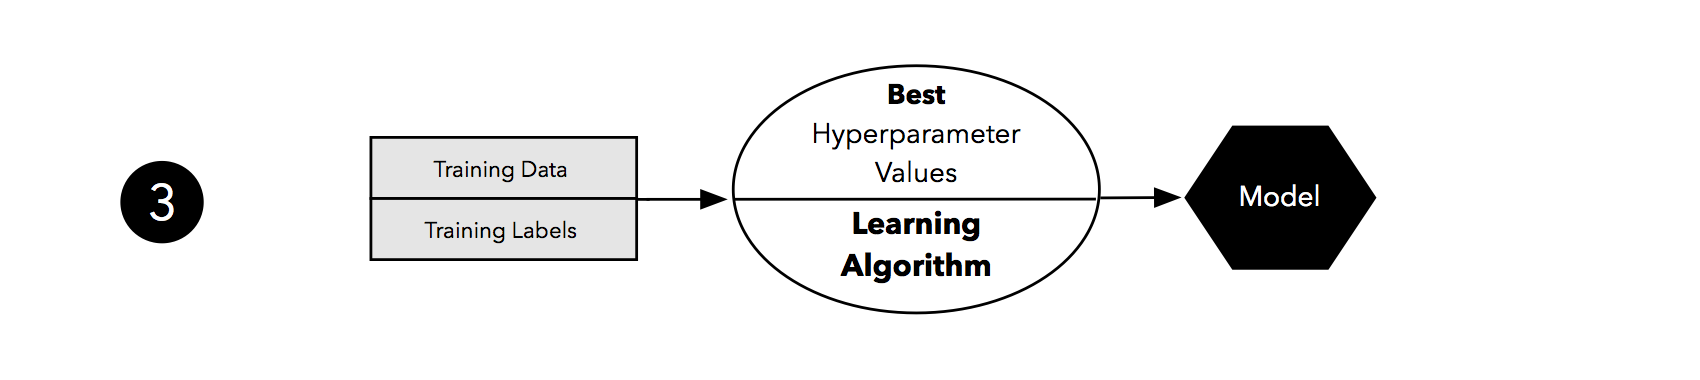

In [38]:
Image(filename='images/ms_3.png', width=1000)

In [39]:
"""
SELECT BEST ESTIMATOR IN EACH ALGORITHM
"""
best_lr = gs_lr.best_estimator_
best_dt = gs_dt.best_estimator_

In [40]:
#Find out which feature is important?
import numpy as np
dt = best_dt.named_steps['decisiontreeclassifier']
pd.DataFrame(list(zip(df.columns, np.transpose(dt.feature_importances_))),
            columns=['feature','importance']).sort_values('importance', axis=0, ascending=False)


,feature,importance
8,month,0.623538
6,loan,0.081454
7,contact,0.035079
0,age,0.021310
2,marital,0.015140
1,job,0.014591
4,default,0.009606
5,housing,0.002285
18,nr.employed,0.002116
9,day_of_week,0.002087


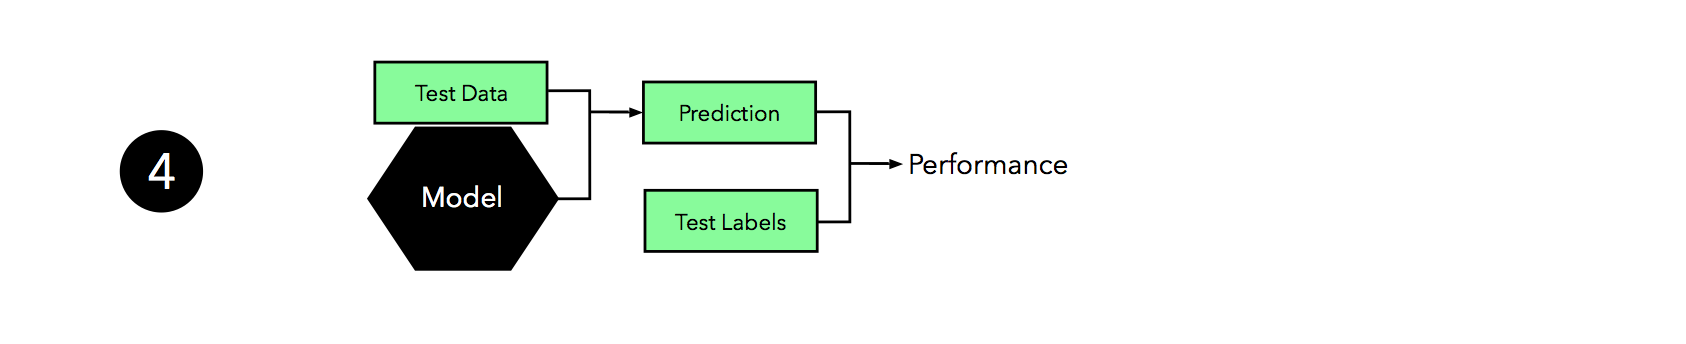

In [41]:
Image(filename='images/ms_4.png', width=1000) 

In [42]:
"""
EVALUATE YOUR MODEL ON TEST DATA
AND PICK YOUR BEST MODEL
"""

from sklearn.metrics import accuracy_score

y_pred_lr_test = best_lr.predict(X_test)
y_pred_dt_test = best_dt.predict(X_test)

y_pred_lr_train = best_lr.predict(X_train)
y_pred_dt_train = best_dt.predict(X_train)

print("Training Error")
print('Logistic Regression Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_lr_train))
print('Decision Tree Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_dt_train))
print("---------------")

print("Testing Error")
print('Logistic Regression Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Decision Tree Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_dt_test))
print("---------------")


Training Error
Logistic Regression Train Accuracy: 0.900
Decision Tree Train Accuracy: 0.905
---------------
Testing Error
Logistic Regression Test Accuracy: 0.901
Decision Tree Test Accuracy: 0.900
---------------


## Calculate ROC_AUC Score

In [43]:
best_lr.predict_proba(X_test)

array([[ 0.91557492,  0.08442508],
       [ 0.95473694,  0.04526306],
       [ 0.91703709,  0.08296291],
       ..., 
       [ 0.58046891,  0.41953109],
       [ 0.94060389,  0.05939611],
       [ 0.91491733,  0.08508267]])

In [44]:
from sklearn.metrics import roc_auc_score

"""
GET Y_PROBA
"""
y_proba = best_lr.predict_proba(X_test)[:, 1]
print('AUC Score: %.3f' % roc_auc_score(y_true=y_test, y_score=y_proba))

AUC Score: 0.792


#### Other matrics

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_lr_test))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_lr_test))


Precision: 0.681
Recall: 0.227
F1: 0.341


In [46]:
# Check a confusion matrix
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_lr_test, labels=[1, 0])
print(confmat)

Image(url='https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png')

[[ 211  717]
 [  99 7211]]


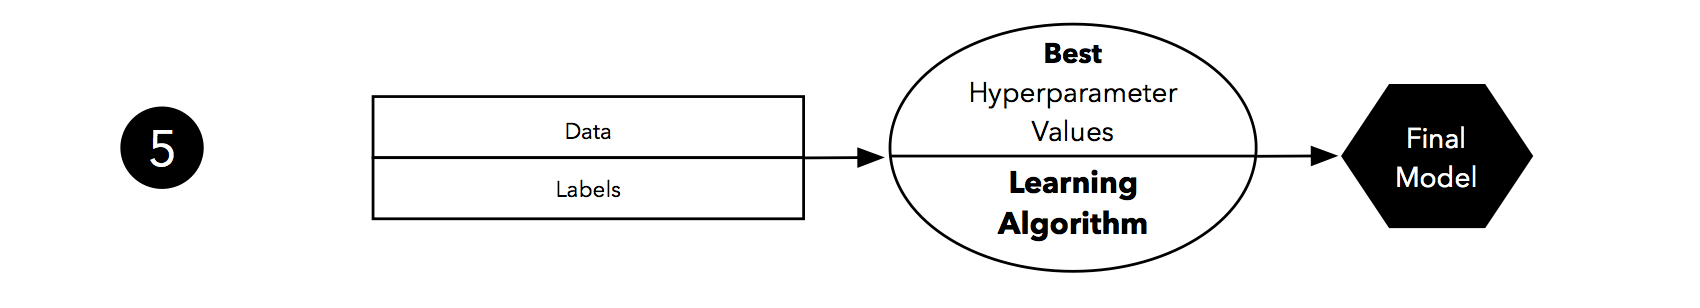

In [47]:
Image(filename='images/ms_5.png', width=1000) 

In [48]:
"""
FIT MODEL ON THE ENTIRE DATA SET
"""
final_model = best_lr.fit(X, y)
print(final_model)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [49]:
import numpy as np
dt = gs_dt.best_estimator_.named_steps['decisiontreeclassifier']

pd.DataFrame(list(zip(df.columns, np.transpose(dt.feature_importances_))),
            columns=['features','importance']).sort_values('importance', axis=0, ascending=False)

,features,importance
8,month,0.623538
6,loan,0.081454
7,contact,0.035079
0,age,0.021310
2,marital,0.015140
1,job,0.014591
4,default,0.009606
5,housing,0.002285
18,nr.employed,0.002116
9,day_of_week,0.002087


In [59]:
# http://scikit-learn.org/stable/modules/tree.html

from sklearn import tree
tree.export_graphviz(best_dt.named_steps['decisiontreeclassifier'], out_file='tree.dot')

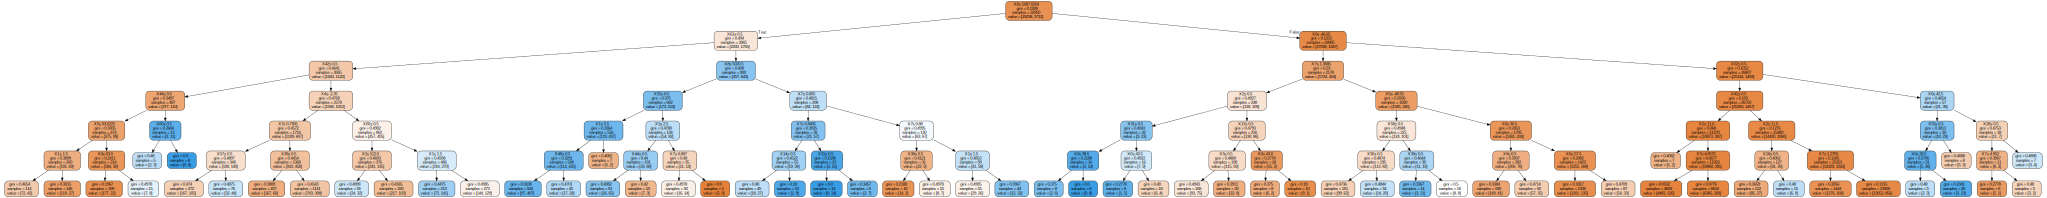

In [70]:
import graphviz 
dot_data = tree.export_graphviz(best_dt.named_steps['decisiontreeclassifier'], out_file=None
                                ,filled=True, rounded=True
                                ,special_characters=True
                               )  
dot_data
graph = graphviz.Source(dot_data)  
graph


In [71]:
best_dt.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')